In [1]:
from spiketimes.simulate import imhomogenous_poisson_process, shuffled_isi_spiketrains
from spiketimes.df import list_to_df, spikes_df_to_binned_df

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
from spiketimes.df import auto_corr_df, cross_corr_df

In [4]:
p = Path(".").absolute().parent / "data" / "spiketimes_pre.feather"
df_spikes = pd.read_feather(p)
df_spikes["spiketimes"] = df_spikes["spike_time_samples"].divide(30000)
df_spikes.head()

,neuron_id,spike_time_samples,experiment_name,group_name,spiketimes
0,276,639262,OPTO,SERT-CHR2,21.308733
1,276,841590,OPTO,SERT-CHR2,28.053000
2,276,1786592,OPTO,SERT-CHR2,59.553067
3,276,2299466,OPTO,SERT-CHR2,76.648867
4,276,2374137,OPTO,SERT-CHR2,79.137900


In [123]:
neurons = df_spikes["neuron_id"].unique()
df1 = df_spikes.loc[df_spikes["neuron_id"].isin(neurons[20:60])]

In [124]:
df = auto_corr_df(df1)

In [125]:
df["zscore"] = (
    df
    .groupby("neuron_id")["auto_correlation"]
    .transform(lambda x: zscore(x))
)

/home/rory/repos/opto_analysis/venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


neuron_id
304    AxesSubplot(0.125,0.125;0.775x0.755)
305    AxesSubplot(0.125,0.125;0.775x0.755)
309    AxesSubplot(0.125,0.125;0.775x0.755)
311    AxesSubplot(0.125,0.125;0.775x0.755)
312    AxesSubplot(0.125,0.125;0.775x0.755)
314    AxesSubplot(0.125,0.125;0.775x0.755)
315    AxesSubplot(0.125,0.125;0.775x0.755)
316    AxesSubplot(0.125,0.125;0.775x0.755)
319    AxesSubplot(0.125,0.125;0.775x0.755)
320    AxesSubplot(0.125,0.125;0.775x0.755)
321    AxesSubplot(0.125,0.125;0.775x0.755)
325    AxesSubplot(0.125,0.125;0.775x0.755)
328    AxesSubplot(0.125,0.125;0.775x0.755)
329    AxesSubplot(0.125,0.125;0.775x0.755)
330    AxesSubplot(0.125,0.125;0.775x0.755)
331    AxesSubplot(0.125,0.125;0.775x0.755)
334    AxesSubplot(0.125,0.125;0.775x0.755)
335    AxesSubplot(0.125,0.125;0.775x0.755)
338    AxesSubplot(0.125,0.125;0.775x0.755)
339    AxesSubplot(0.125,0.125;0.775x0.755)
341    AxesSubplot(0.125,0.125;0.775x0.755)
345    AxesSubplot(0.125,0.125;0.775x0.755)
348    AxesSubplot(0.1

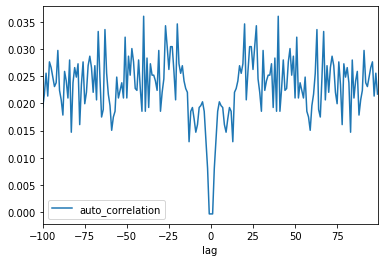

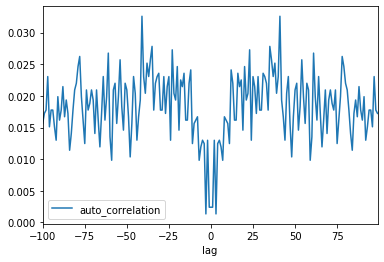

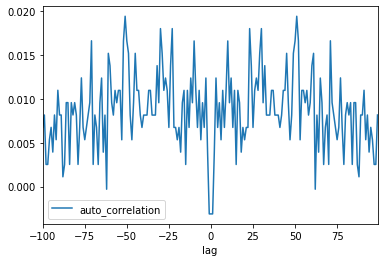

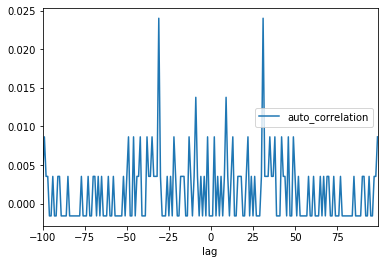

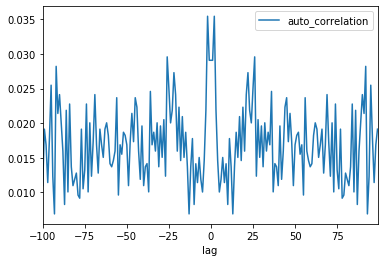

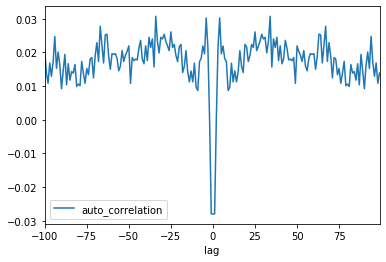

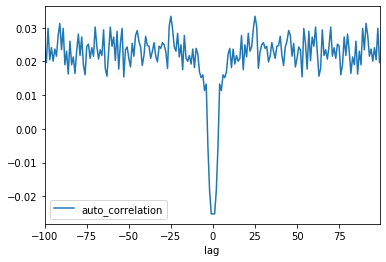

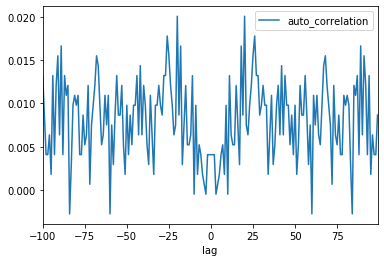

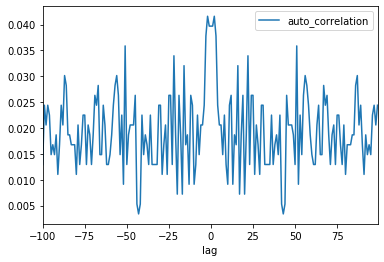

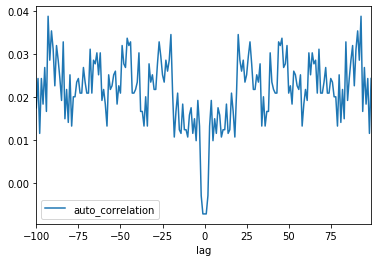

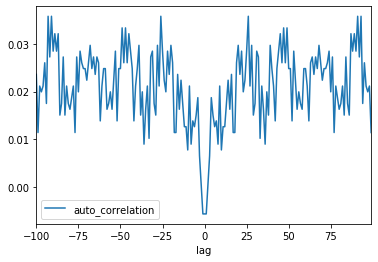

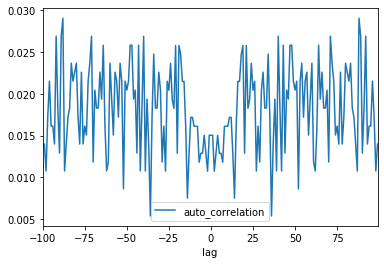

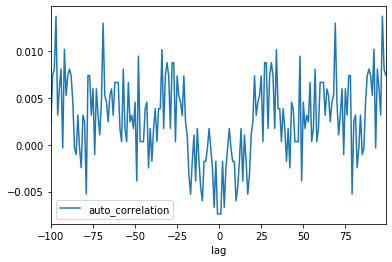

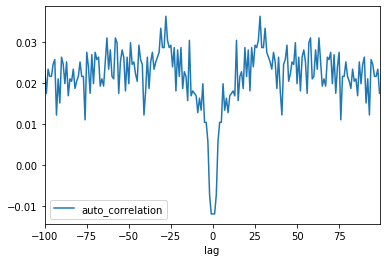

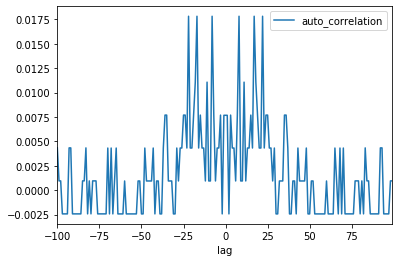

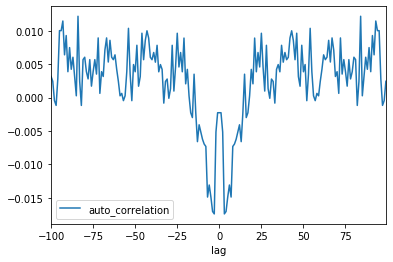

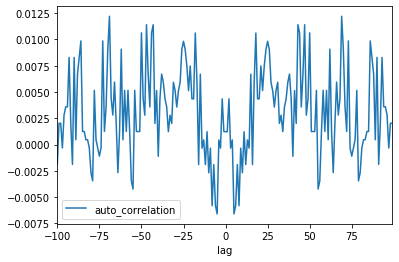

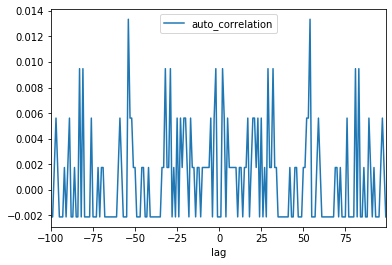

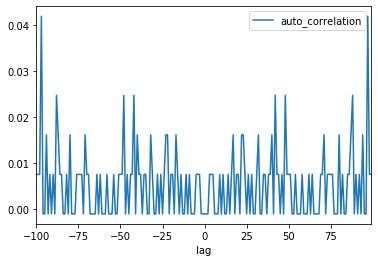

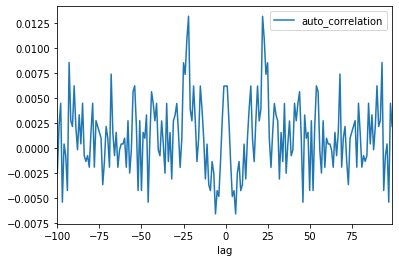

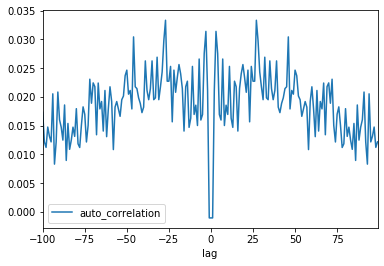

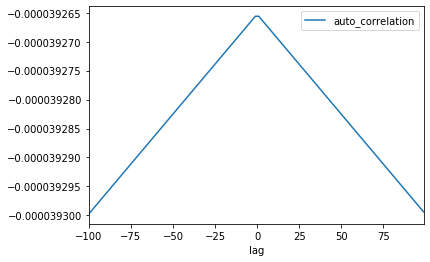

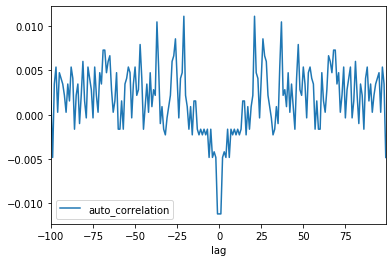

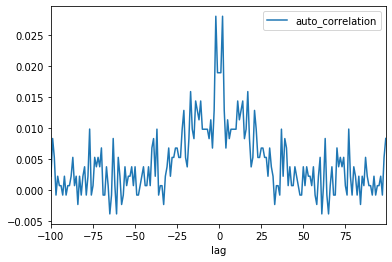

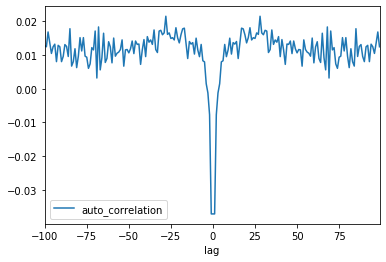

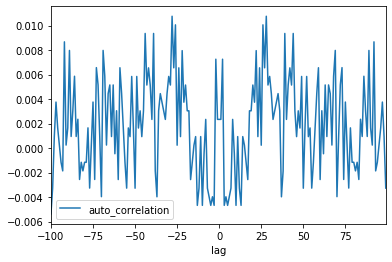

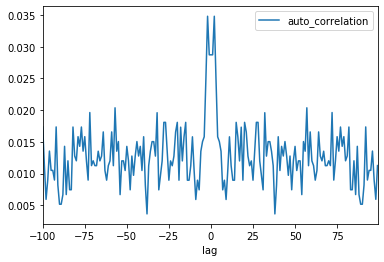

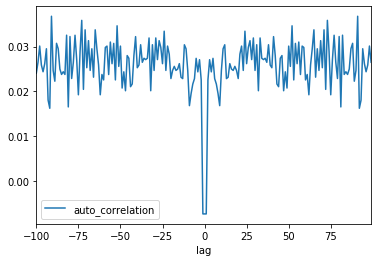

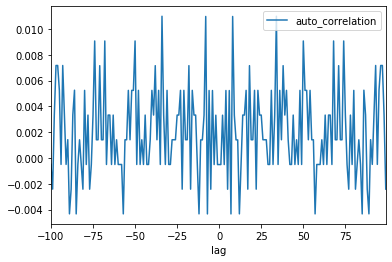

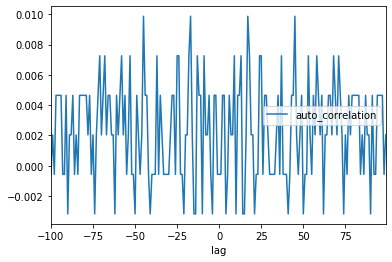

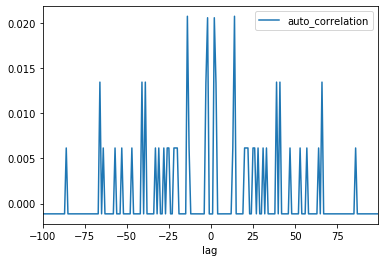

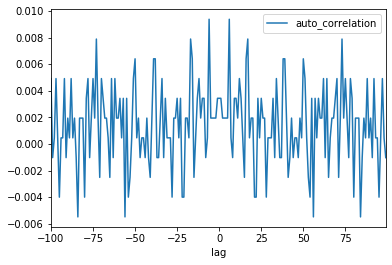

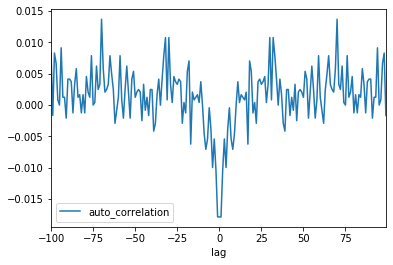

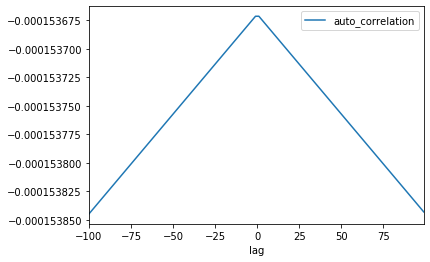

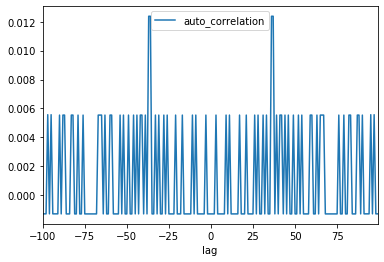

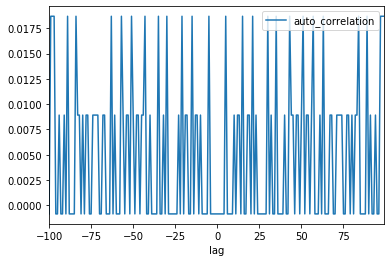

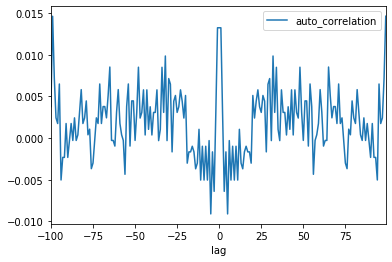

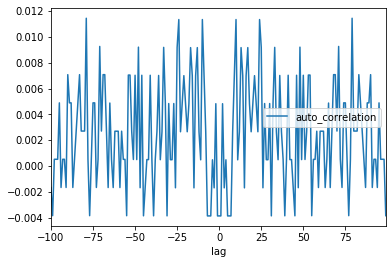

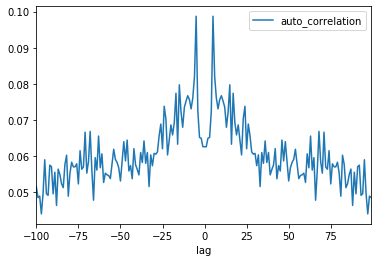

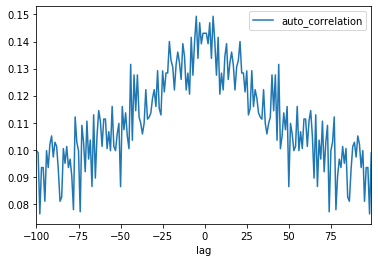

In [126]:
df.groupby("neuron_id").plot(y="auto_correlation", x="lag")

In [110]:
df_cross_corr = cross_corr_df(df1, fs=1000, num_lags=30)

In [111]:
df = df_cross_corr

In [112]:
from scipy.stats import zscore

df_cross_corr["zscore"] = (
    df_cross_corr
    .groupby(["neuron_1", "neuron_2"])["cross_correlation"]
    .transform(lambda x: zscore(x))
)

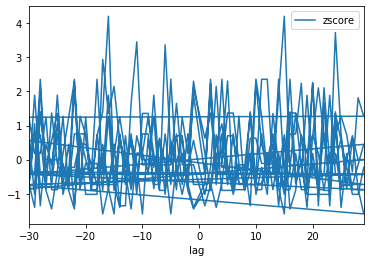

In [113]:
neurons = df["neuron_2"].unique()
ax = df[df["neuron_1"] == neurons[9]].plot(x="lag", y="zscore")
# ax.set_ylim([-0.02, 0.5])

neuron_1  neuron_2
304       305         AxesSubplot(0.125,0.125;0.775x0.755)
          309         AxesSubplot(0.125,0.125;0.775x0.755)
          311         AxesSubplot(0.125,0.125;0.775x0.755)
          312         AxesSubplot(0.125,0.125;0.775x0.755)
          314         AxesSubplot(0.125,0.125;0.775x0.755)
                                      ...                 
334       338         AxesSubplot(0.125,0.125;0.775x0.755)
          339         AxesSubplot(0.125,0.125;0.775x0.755)
335       338         AxesSubplot(0.125,0.125;0.775x0.755)
          339         AxesSubplot(0.125,0.125;0.775x0.755)
338       339         AxesSubplot(0.125,0.125;0.775x0.755)
Length: 190, dtype: object

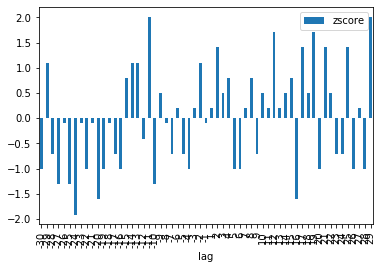

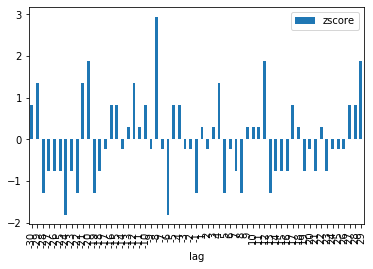

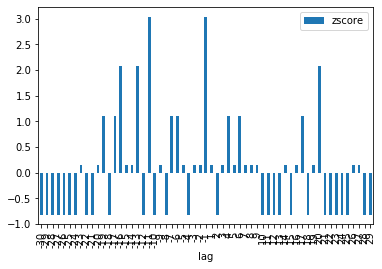

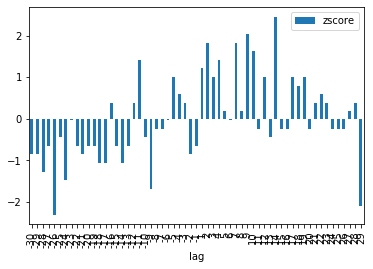

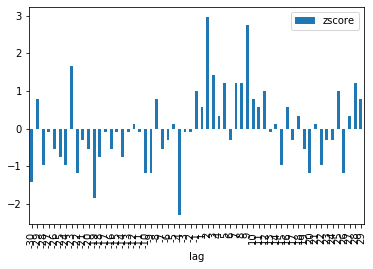

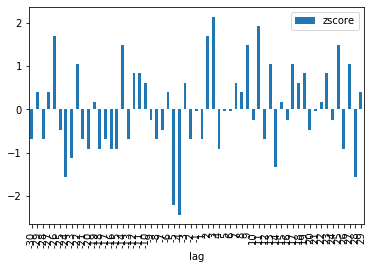

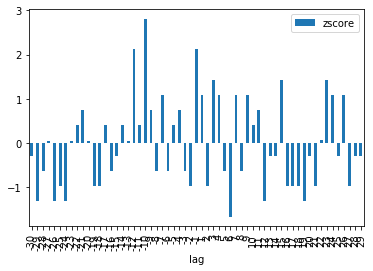

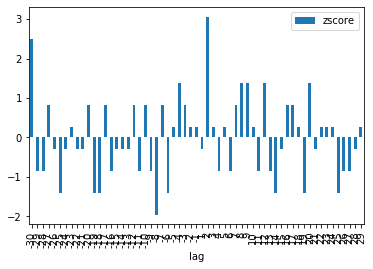

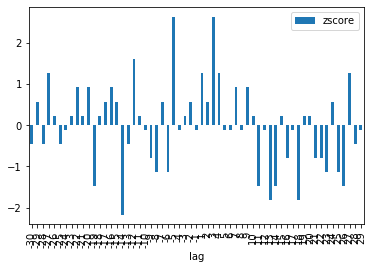

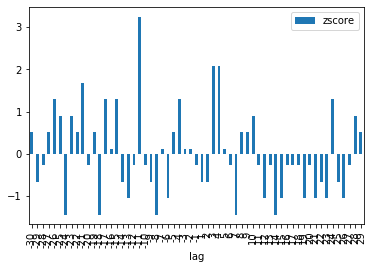

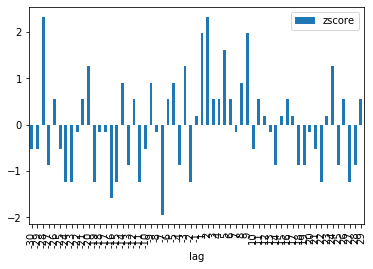

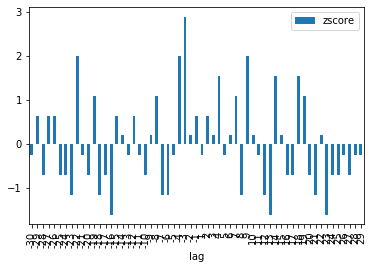

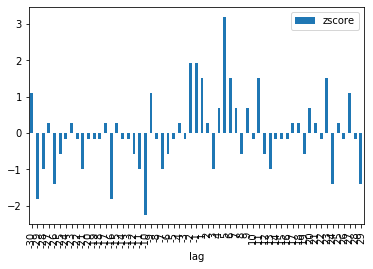

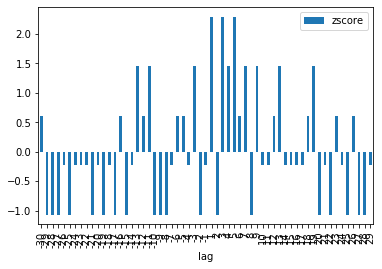

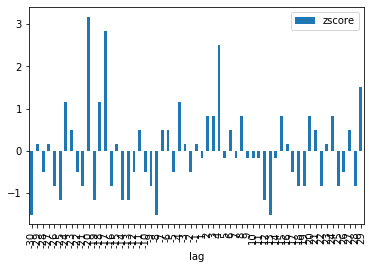

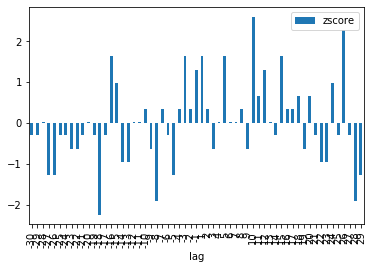

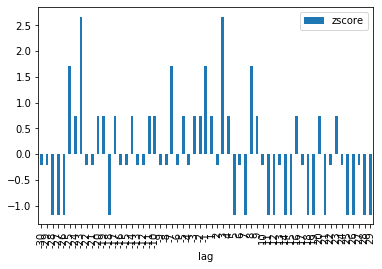

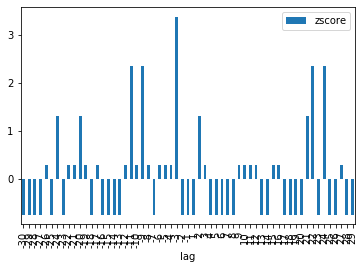

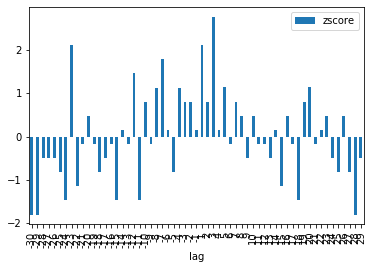

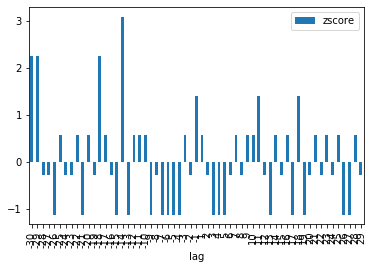

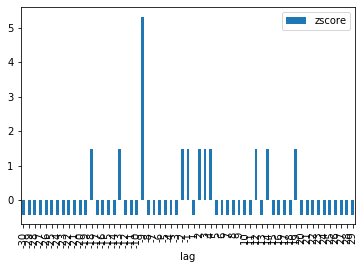

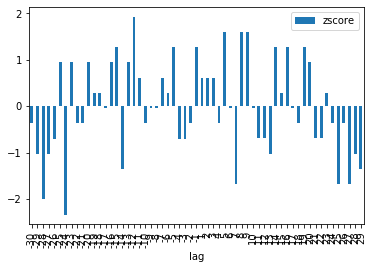

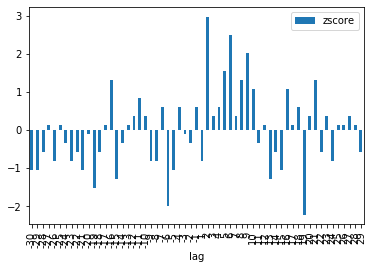

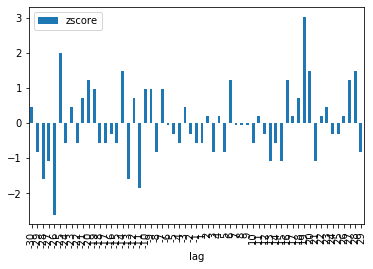

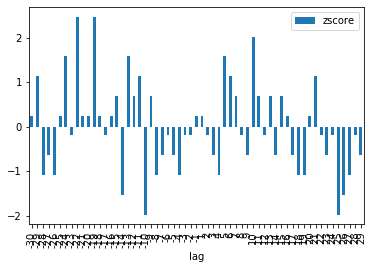

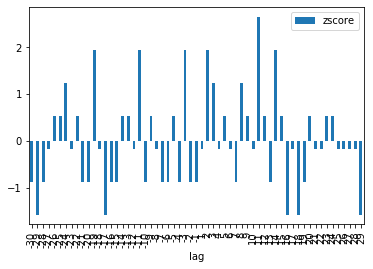

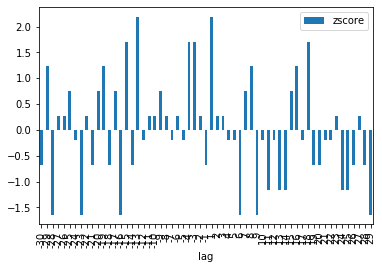

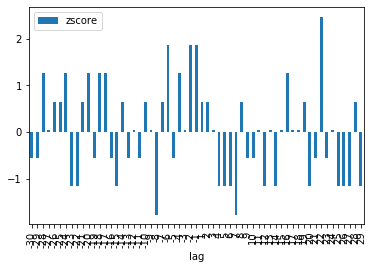

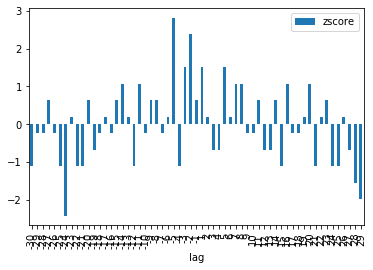

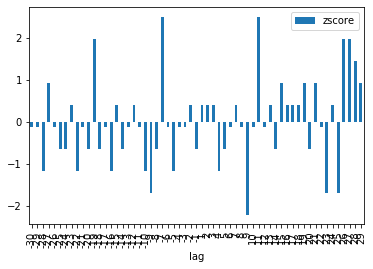

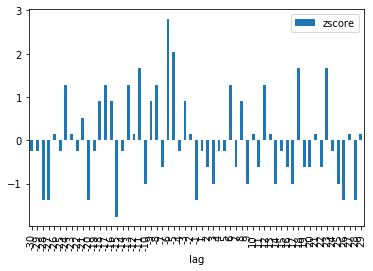

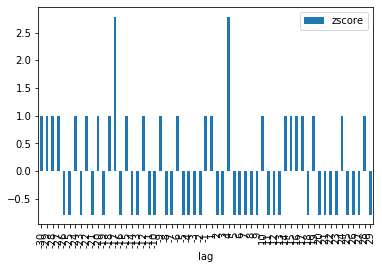

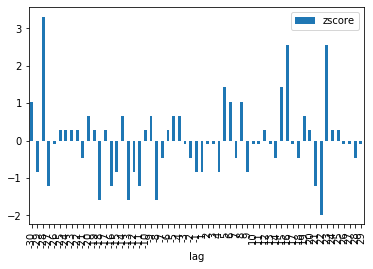

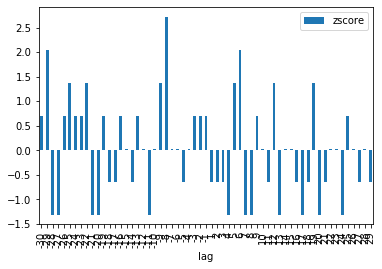

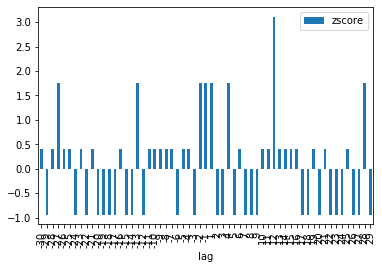

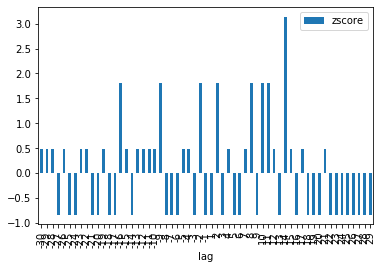

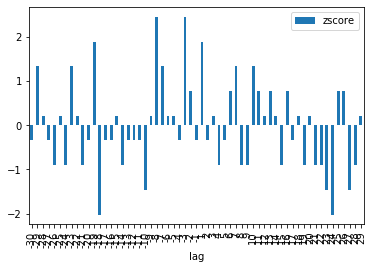

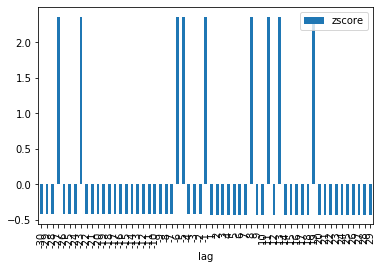

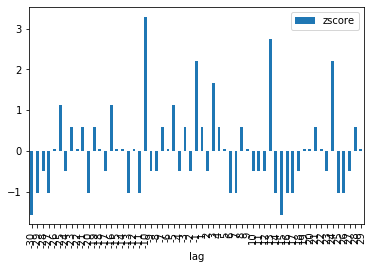

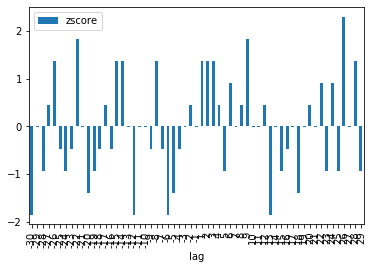

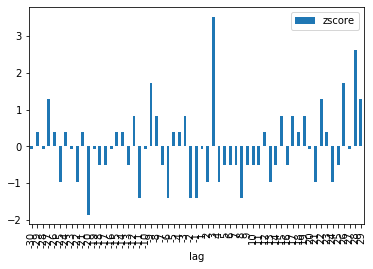

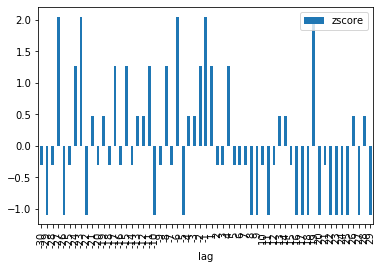

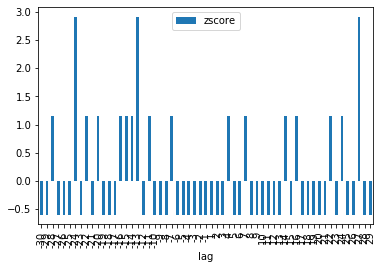

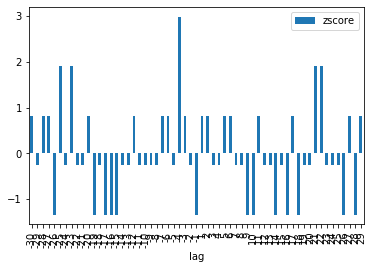

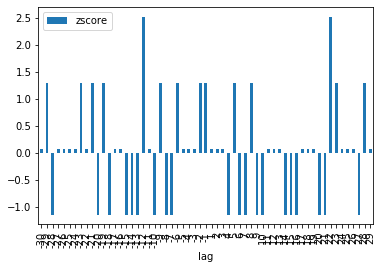

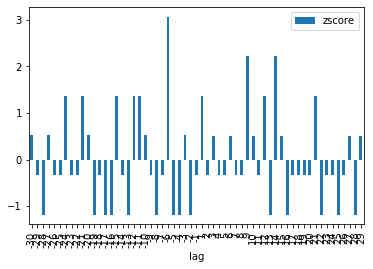

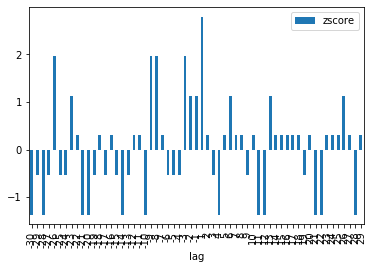

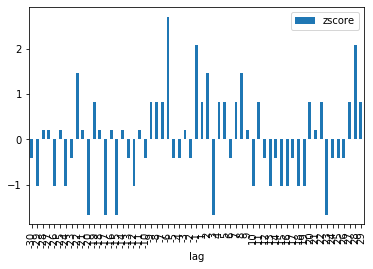

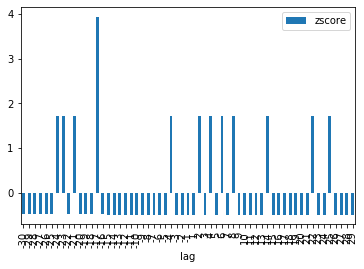

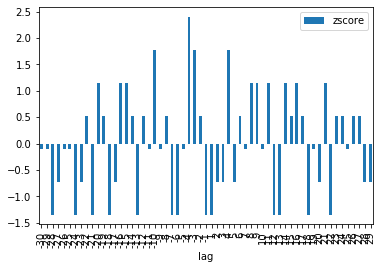

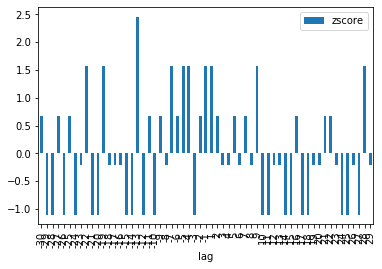

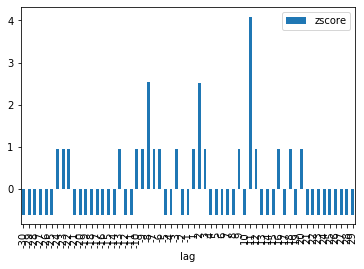

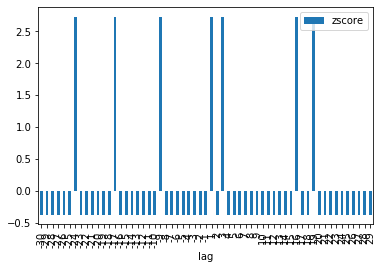

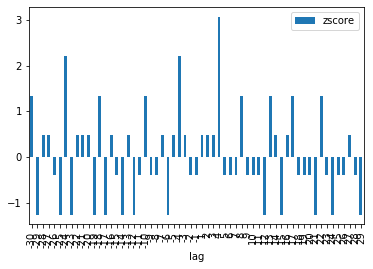

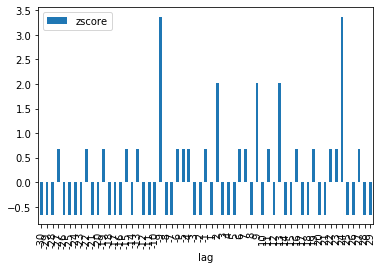

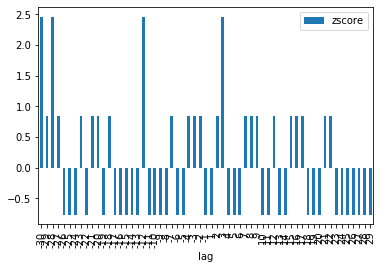

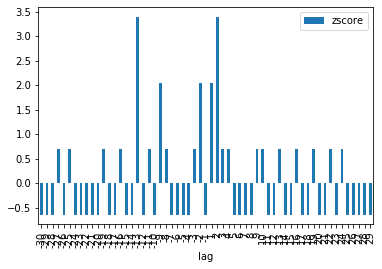

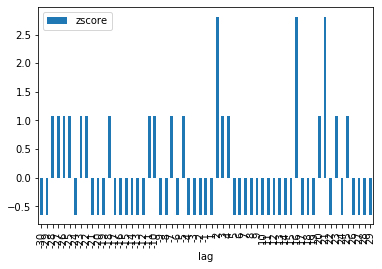

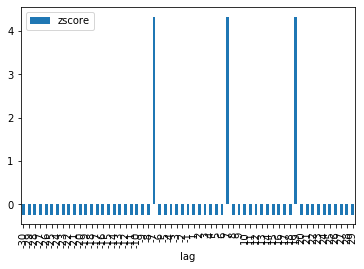

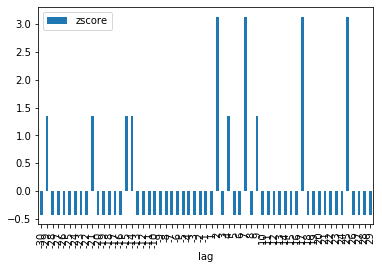

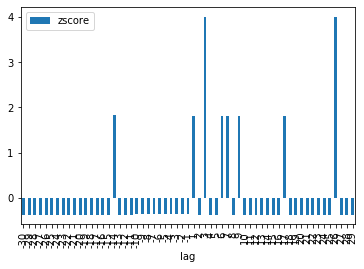

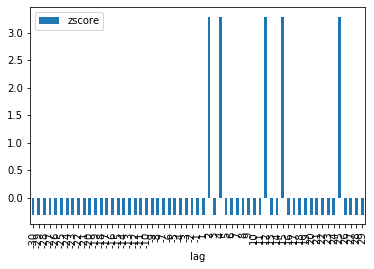

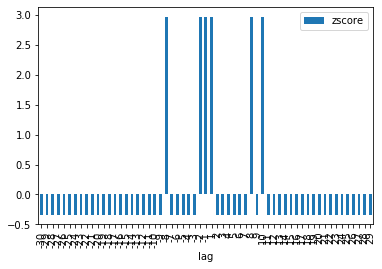

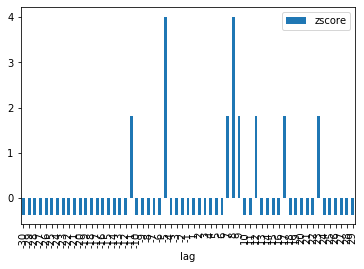

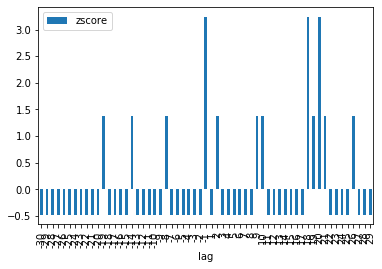

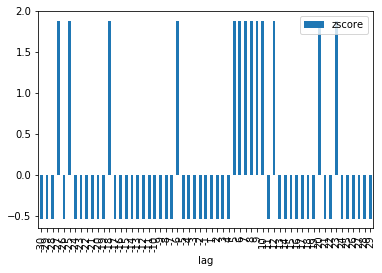

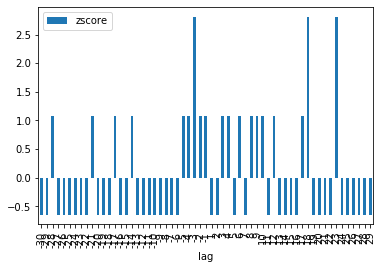

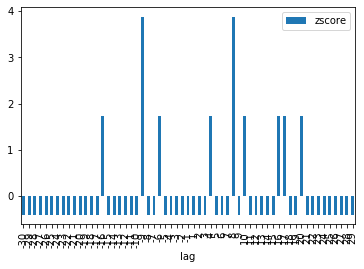

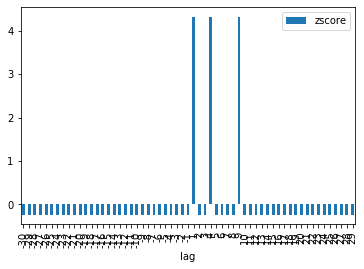

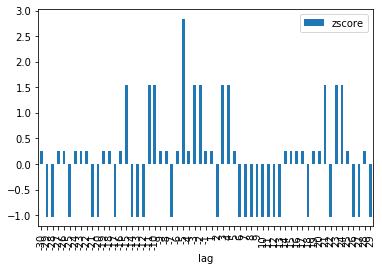

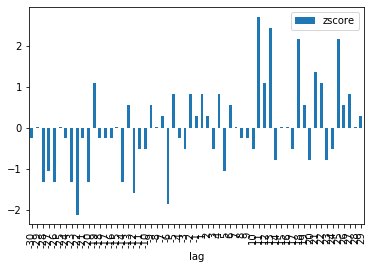

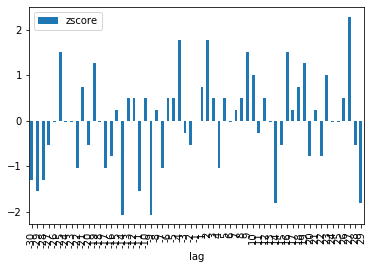

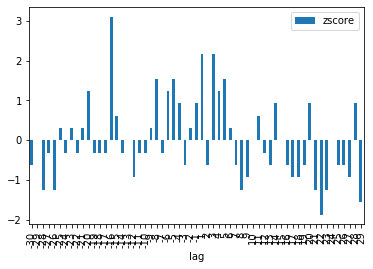

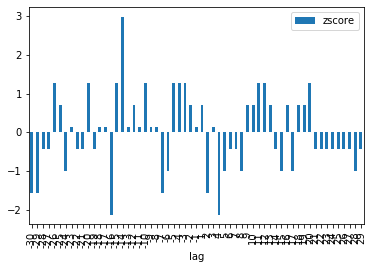

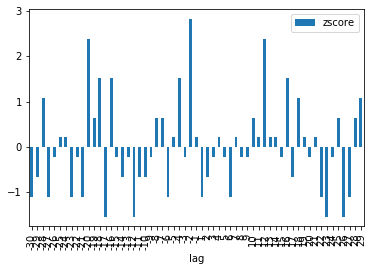

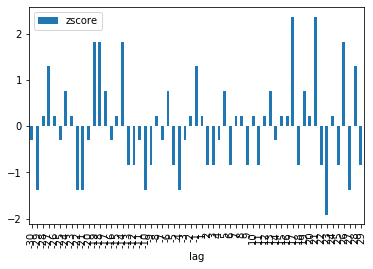

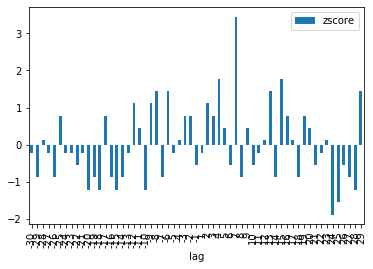

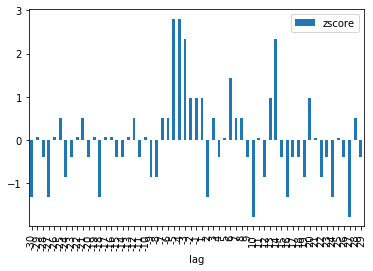

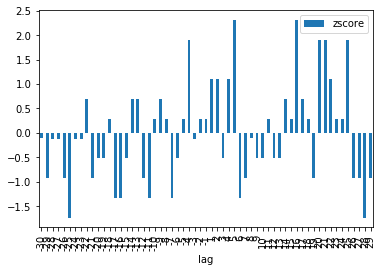

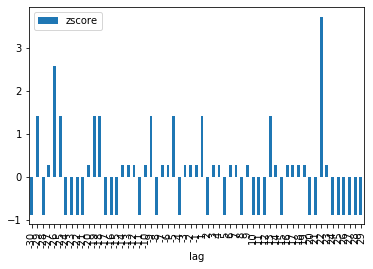

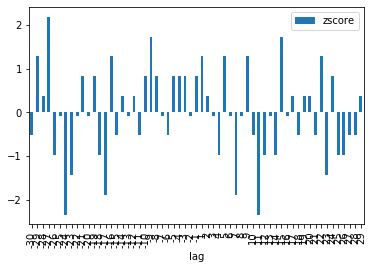

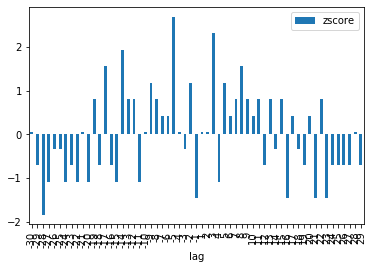

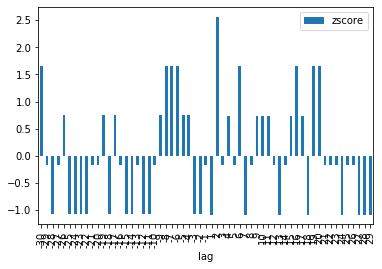

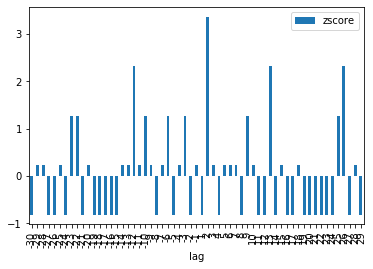

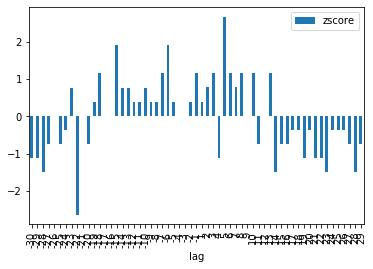

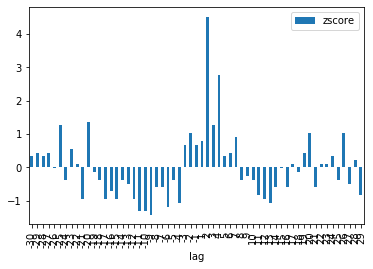

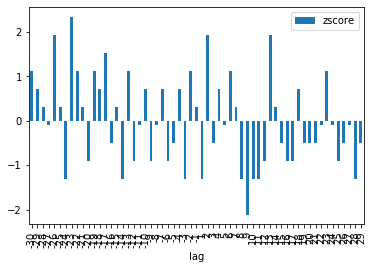

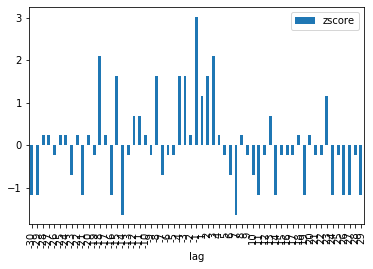

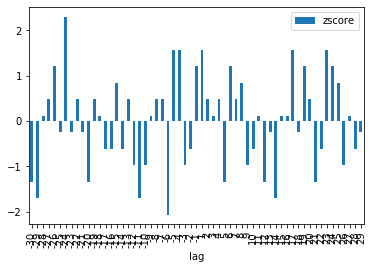

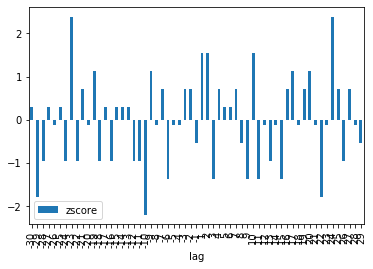

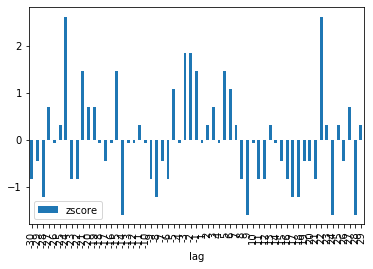

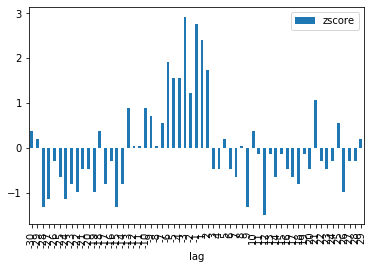

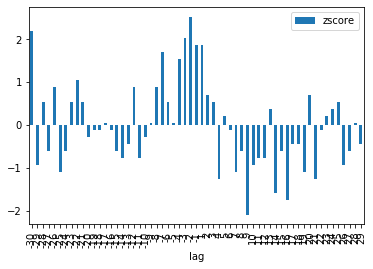

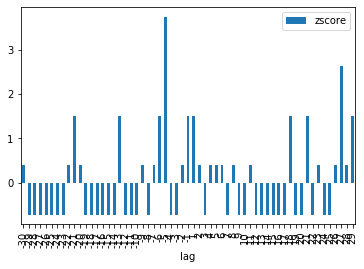

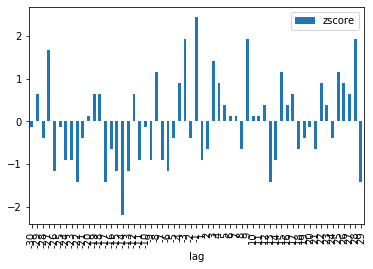

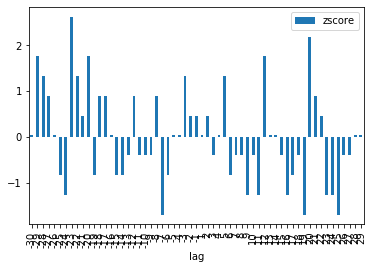

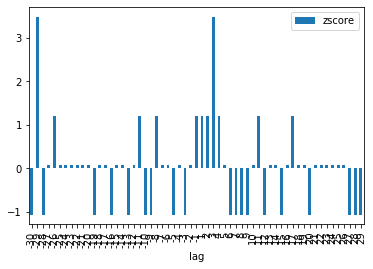

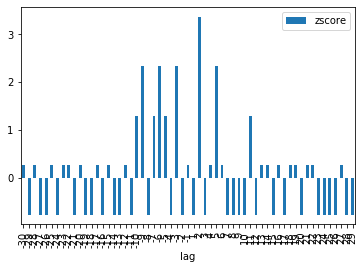

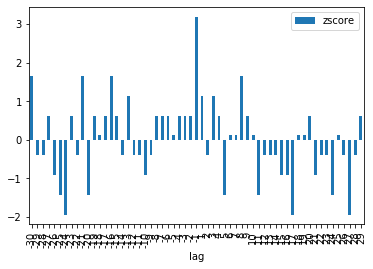

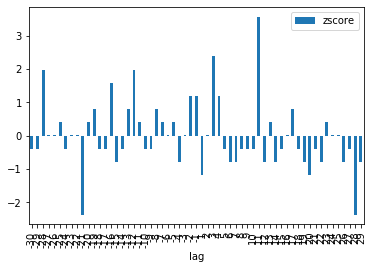

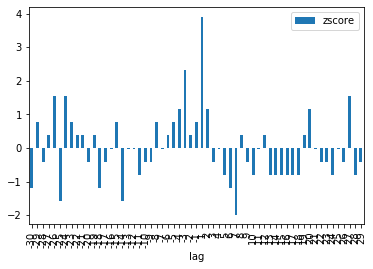

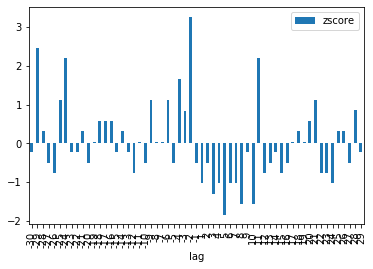

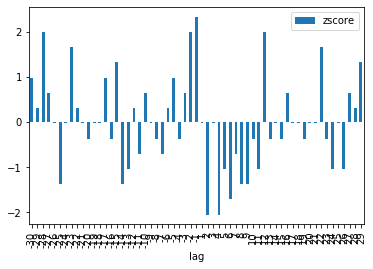

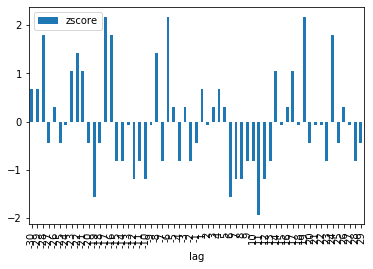

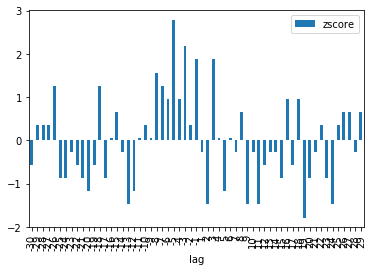

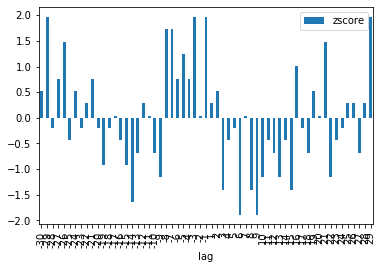

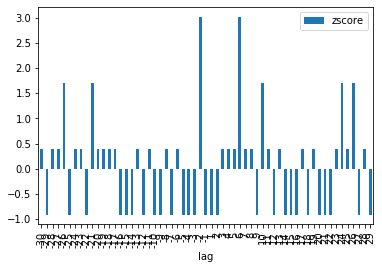

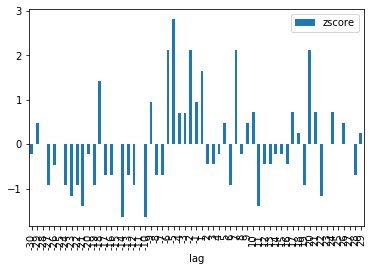

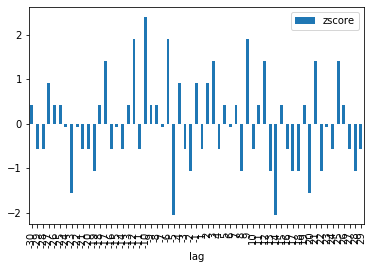

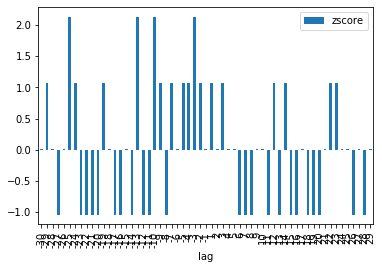

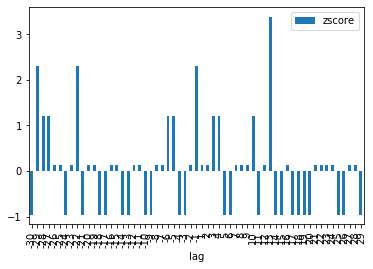

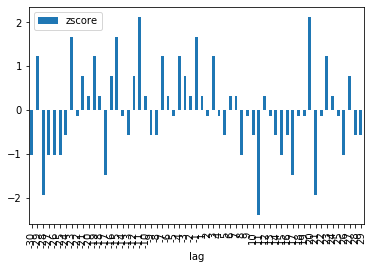

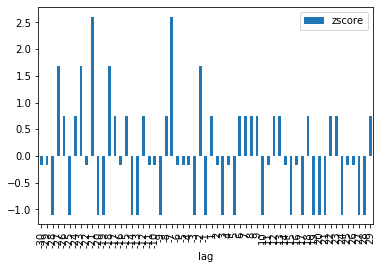

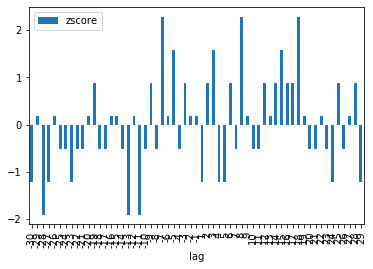

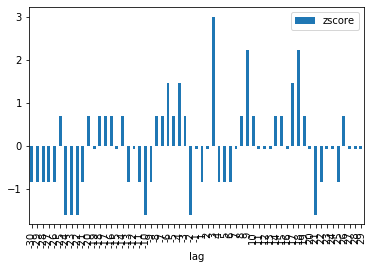

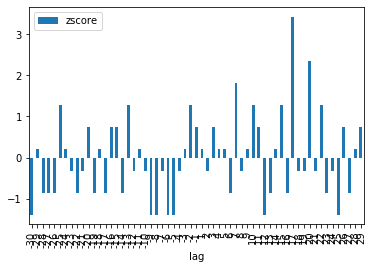

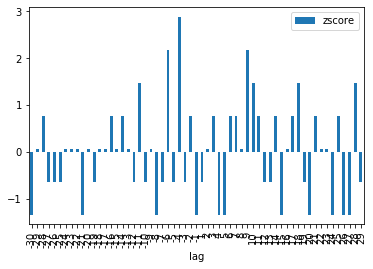

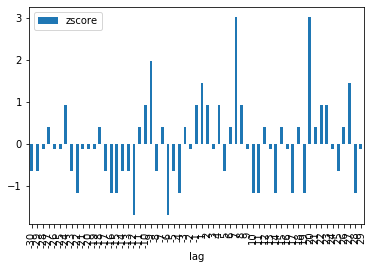

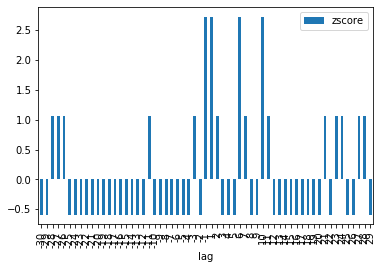

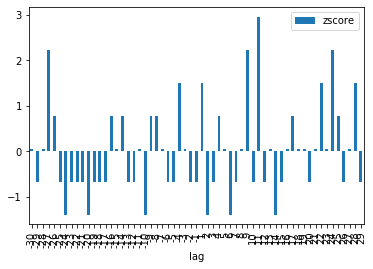

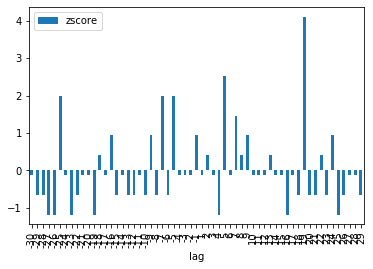

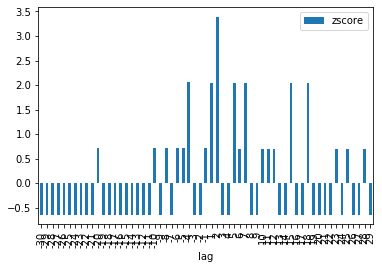

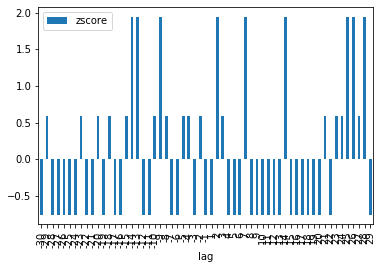

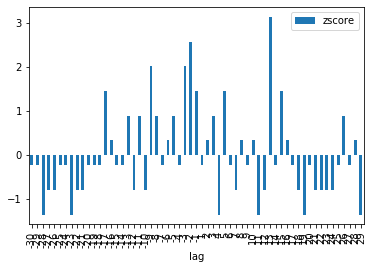

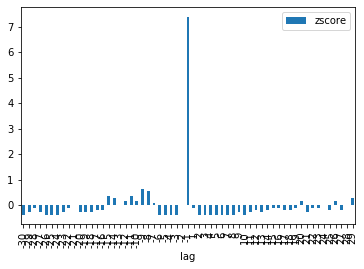

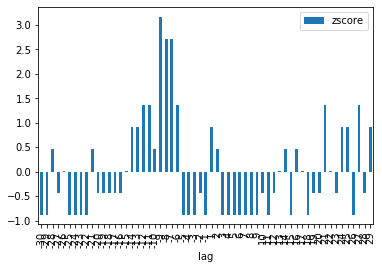

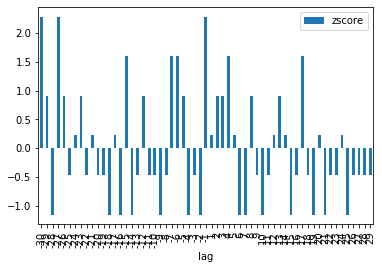

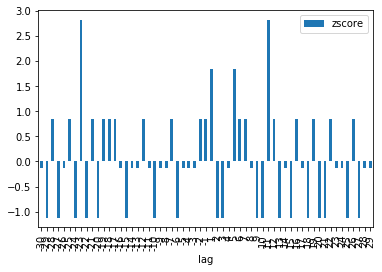

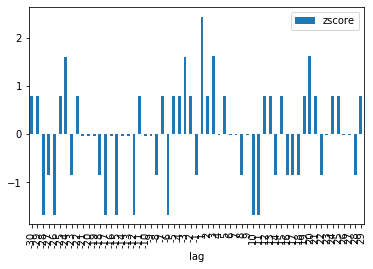

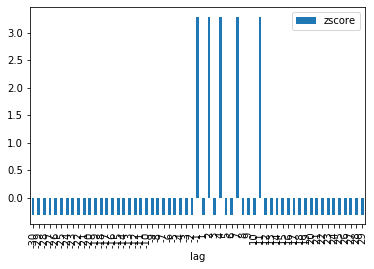

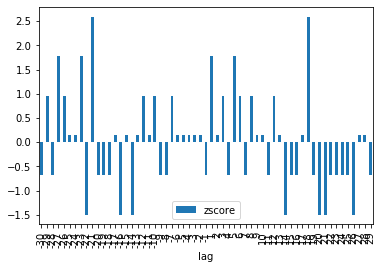

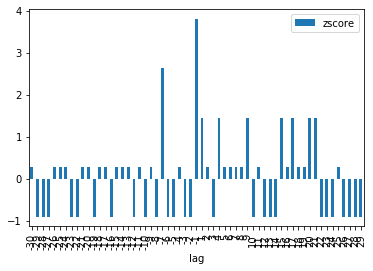

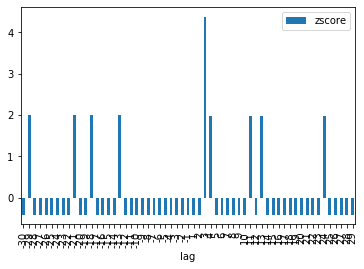

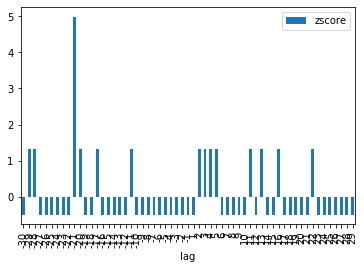

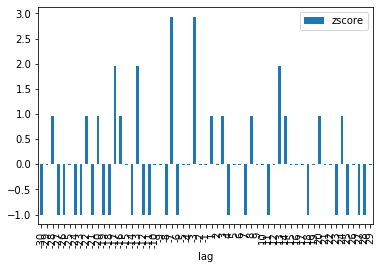

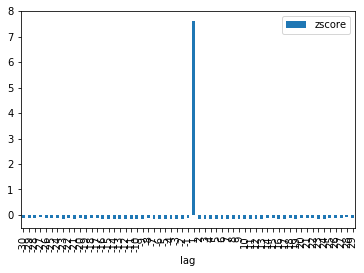

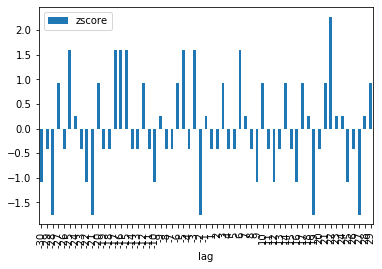

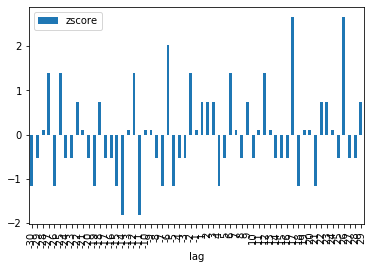

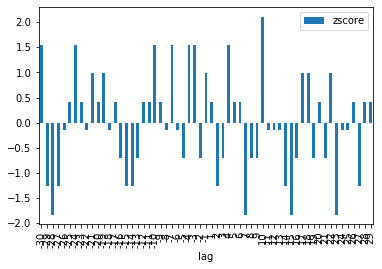

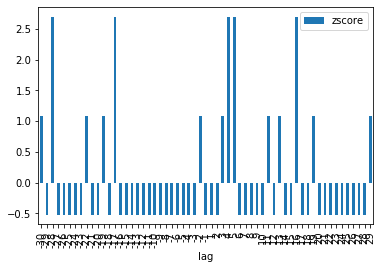

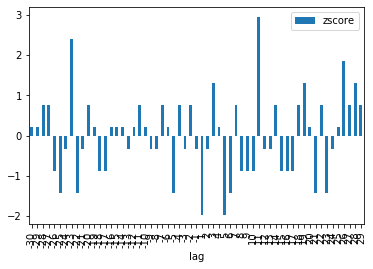

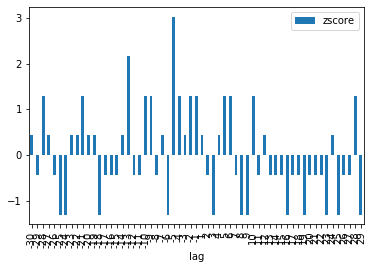

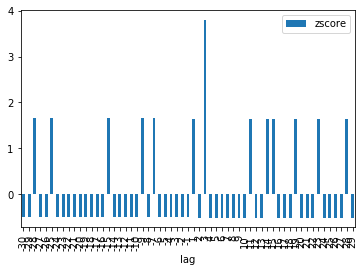

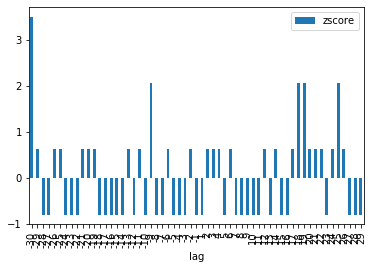

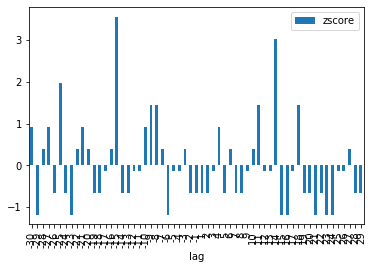

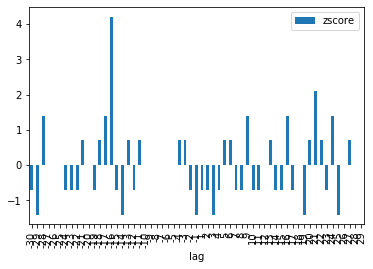

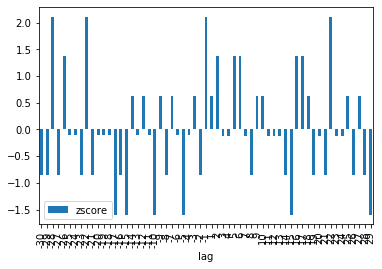

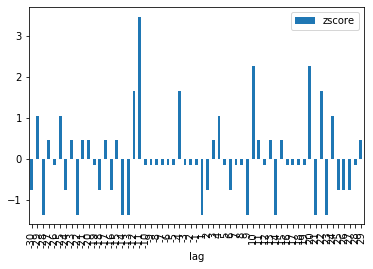

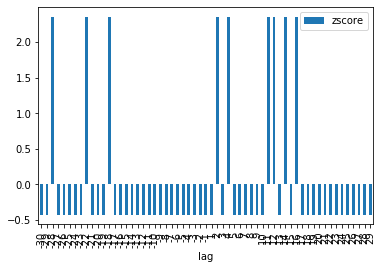

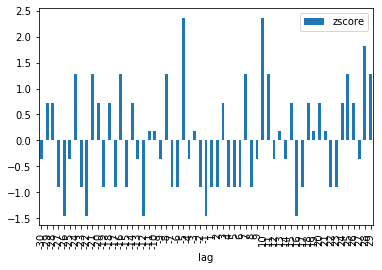

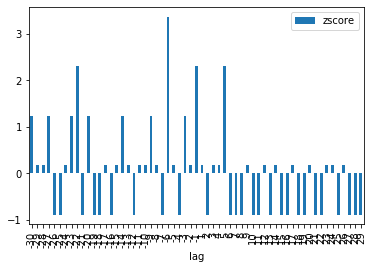

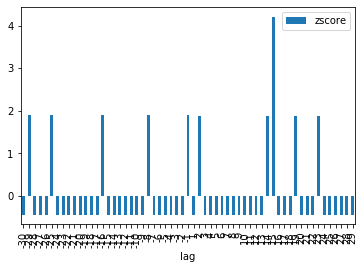

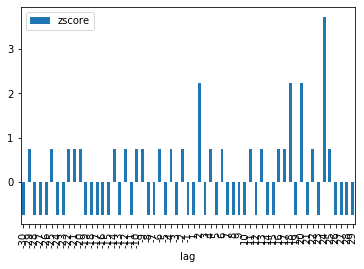

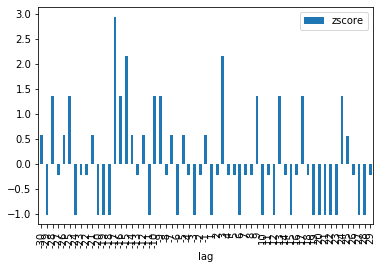

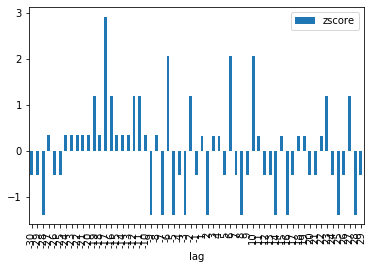

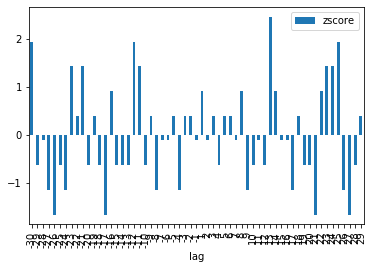

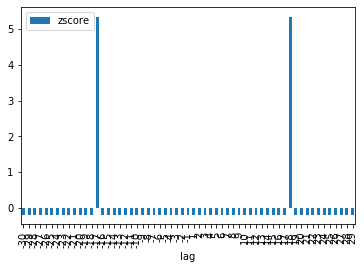

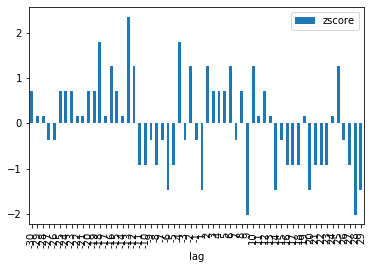

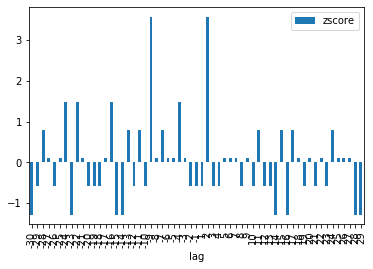

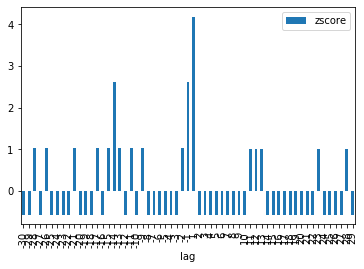

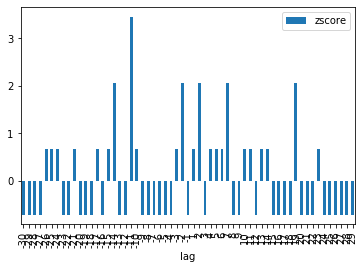

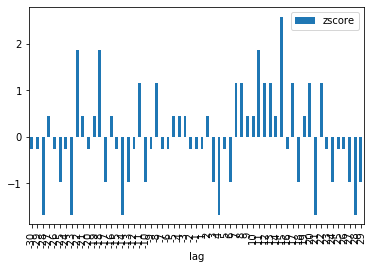

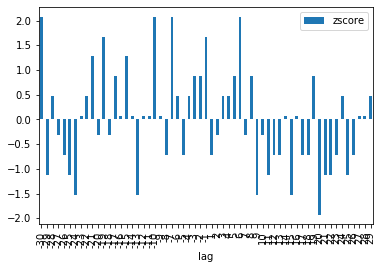

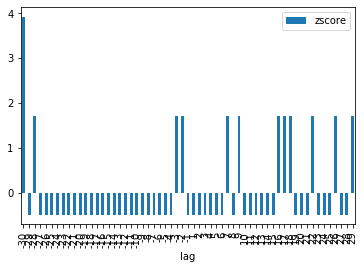

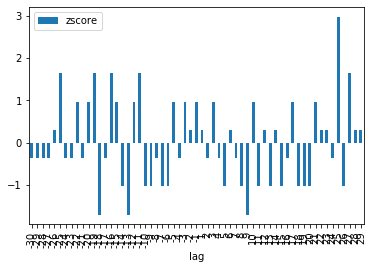

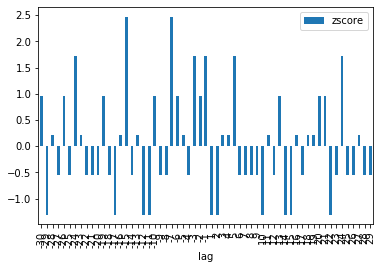

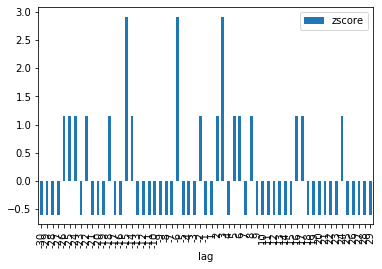

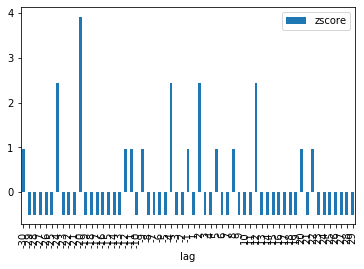

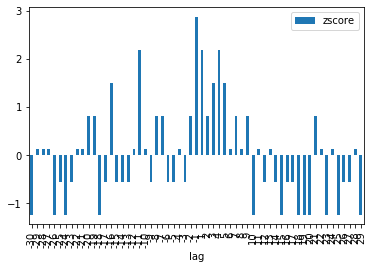

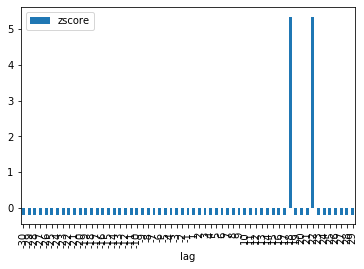

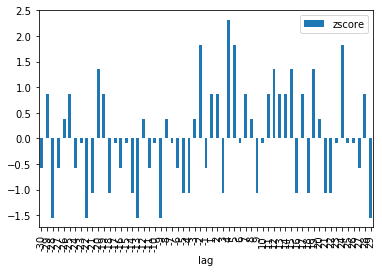

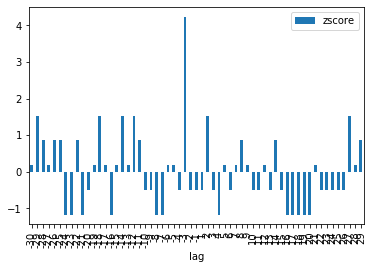

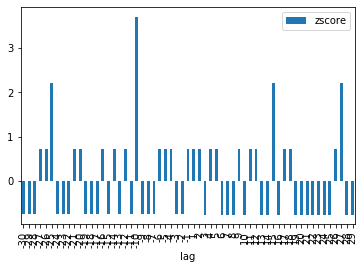

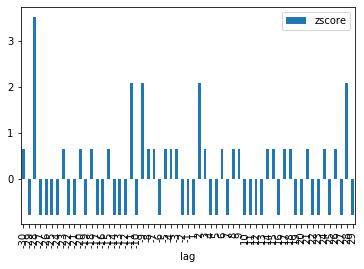

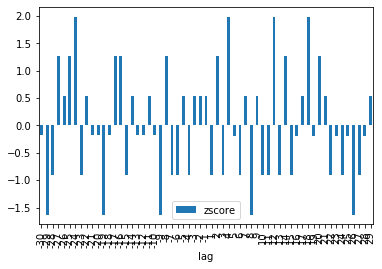

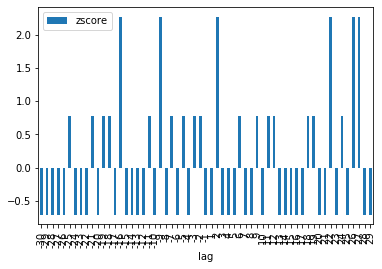

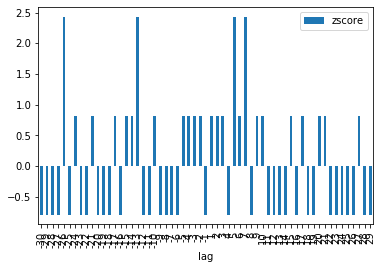

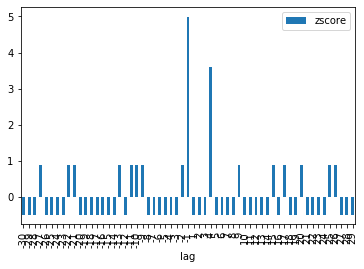

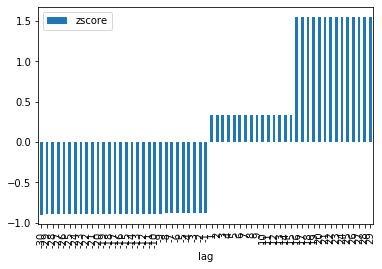

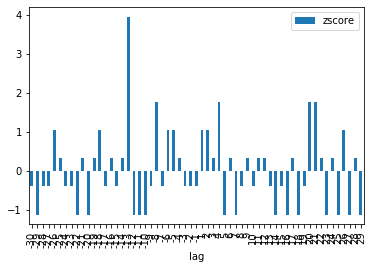

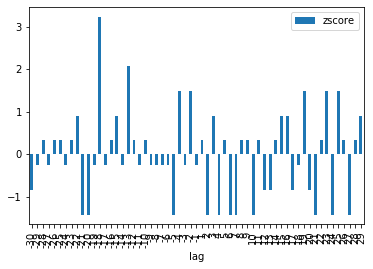

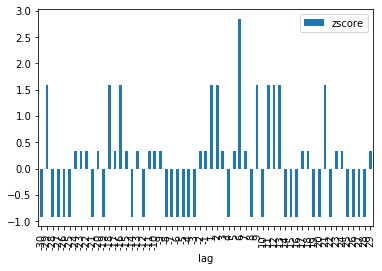

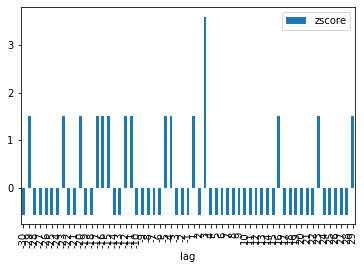

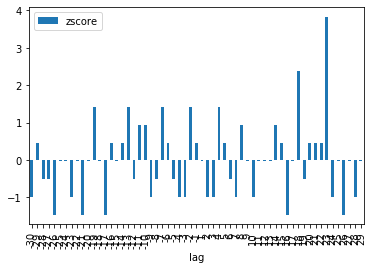

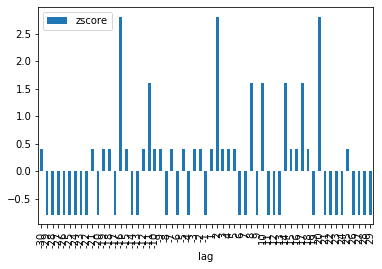

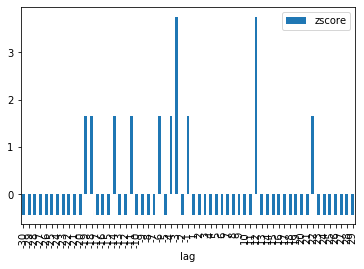

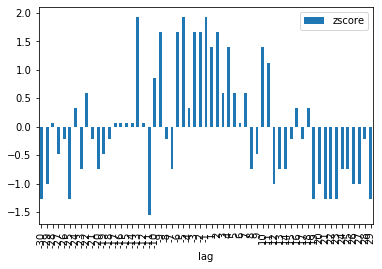

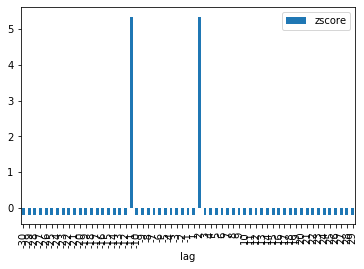

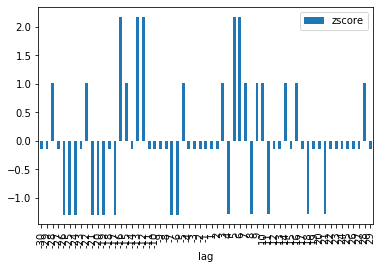

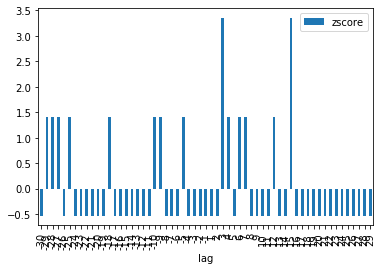

In [116]:
(
    df_cross_corr
    .groupby(["neuron_1", "neuron_2"])
    .filter(lambda x: np.max(np.bincount(x["zscore"] + 10)) <= 80)
    .groupby(["neuron_1", "neuron_2"])
    .plot(y="zscore", x="lag", kind="bar")
)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37810 entries, 0 to 198
Data columns (total 5 columns):
lag                  37810 non-null int64
cross_correlation    37810 non-null float64
neuron_1             37810 non-null int64
neuron_2             37810 non-null int64
zscore               37810 non-null float64
dtypes: float64(2), int64(3)
memory usage: 1.7 MB
